In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [139]:
data_sale = pd.read_csv('../Python_Practice/Dataset/predict_future_sales/predict_future_sales/sales.csv')
data_shop = pd.read_csv('../Python_Practice/Dataset/predict_future_sales/predict_future_sales/shops.csv')
data_sale['total_turnover']=data_sale['item_price']*data_sale['item_cnt_day']
data_sale
#data_shop

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_turnover
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [4]:
data_sale.describe()
data_sale.info()
data_sale.isnull().sum()
data_sale.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   total_turnover  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 156.8+ MB


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
total_turnover    0
dtype: int64

In [5]:
data_shop.info()

data_sale.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   total_turnover  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 156.8+ MB


In [72]:
#chọn ngẫu nhiên 3 shop và dùng show doanh thu
df = pd.merge(data_sale, data_shop, on='shop_id', how='outer', indicator=True).groupby(by=['date_block_num','shop_id', 'shop_name']).agg({'total_turnover':'sum'})
df = df.reset_index()
df


,date_block_num,shop_id,shop_name,total_turnover
0,0,0,"!Якутск Орджоникидзе, 56 фран",2966412.00
1,0,1,"!Якутск ТЦ ""Центральный"" фран",1527320.00
2,0,2,"Адыгея ТЦ ""Мега""",1085064.80
3,0,3,"Балашиха ТРК ""Октябрь-Киномир""",560585.01
4,0,4,"Волжский ТЦ ""Волга Молл""",1433666.00
...,...,...,...,...
1581,33,55,Цифровой склад 1С-Онлайн,1516423.00
1582,33,56,"Чехов ТРЦ ""Карнавал""",1321063.00
1583,33,57,"Якутск Орджоникидзе, 56",2417292.00
1584,33,58,"Якутск ТЦ ""Центральный""",1762288.00


Doanh thu của 3 shop ngẫu nhiên

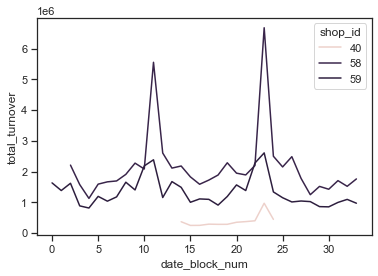

In [74]:
np.random.seed(0)
rd_shop = np.random.choice(df.shop_id.unique(), size=3)
#rd_shop
random_shop_df = df[np.isin(df.shop_id, rd_shop)]
#random_shop_df
plot = sns.lineplot(x = 'date_block_num', y = 'total_turnover', hue = 'shop_id', data=random_shop_df,)


In [75]:
#Doanh thu theo thang cua item ngẫu nhiên
np.random.seed(0)
rd_item = np.random.choice(data_sale.item_id.unique(), size=1)
rd_item
#data_sale.head()

array([11484], dtype=int64)

In [76]:
sale_of_item = data_sale.groupby(by=['date_block_num', 'item_id']).agg({'item_cnt_day':sum,'total_turnover':sum}).reset_index()
item_df = sale_of_item[sale_of_item.item_id == rd_item[0]]
item_df.head()

,date_block_num,item_id,item_cnt_day,total_turnover
4092,0,11484,43.0,6191.0
12293,1,11484,30.0,4182.0
20462,2,11484,30.0,4326.0
28621,3,11484,50.0,5650.0
36982,4,11484,150.0,14498.4


Text(0.5, 1.0, 'Số lượng hàng bán ra và doanh thu theo tháng')

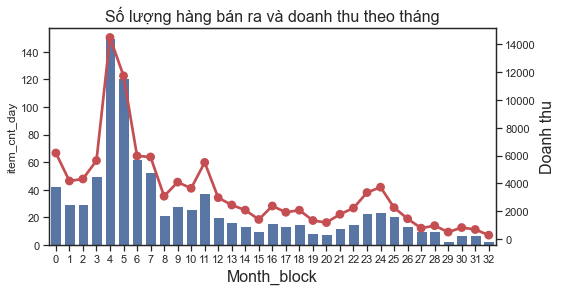

In [142]:
fig, ax1 = plt.subplots(figsize=(8,4))
sns.set_style('ticks')
ax1 = sns.barplot(x='date_block_num', y='item_cnt_day', color = "b", data = item_fr)
ax1.set_xlabel('Month_block', fontsize=16)

ax2 = ax1.twinx()
ax2 = sns.pointplot(x='date_block_num', y='total_turnover', color = "r", data = item_fr)
ax2.set_ylabel('Doanh thu', fontsize=16)

ax1.set_title('Số lượng hàng bán ra và doanh thu theo tháng', fontsize=16)


In [79]:
data_sale['Year']= data_sale.date.apply(lambda x: x.split('.')[-1])
data_sale['Month']= data_sale.date.apply(lambda x: x.split('.')[-2]) 
data_sale.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_turnover,Year,Month
0,02.01.2013,0,59,22154,999.00,1.0,999.00,2013,01
1,03.01.2013,0,25,2552,899.00,1.0,899.00,2013,01
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00,2013,01
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05,2013,01
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00,2013,01


In [80]:
sale_in_year = data_sale.groupby(by=['Year','Month','item_id','shop_id']).agg({'total_turnover':sum}).reset_index()
sale_in_year['shop_id']

0          25
1           1
2           2
3          10
4          19
           ..
1609119    28
1609120    37
1609121    42
1609122    47
1609123    50
Name: shop_id, Length: 1609124, dtype: int64

In [81]:
def trendofShop (shop):
    listshop = sale_in_year.shop_id.unique()
    for shop in listshop:
        df_shop = sale_in_year[sale_in_year.shop_id == shop]
        chart = sns.lineplot(data = df_shop, x='Month',y='total_turnover', hue = 'Year')
        return df_shop, chart

(         Year Month  item_id  shop_id  total_turnover
 0        2013    01       19       25            28.0
 32       2013    01       32       25         14309.0
 65       2013    01       33       25          2495.0
 86       2013    01       34       25           298.0
 100      2013    01       35       25          4389.0
 ...       ...   ...      ...      ...             ...
 1609063  2015    10    22145       25           199.0
 1609077  2015    10    22162       25           349.0
 1609089  2015    10    22163       25           676.0
 1609104  2015    10    22164       25          1098.0
 1609117  2015    10    22167       25           897.0
 
 [87977 rows x 5 columns],
 <AxesSubplot:xlabel='Month', ylabel='total_turnover'>)

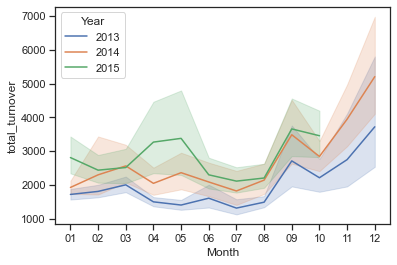

In [21]:
trendofShop(19)

Trong từng năm
shop nào có doanh thu cao nhất
tháng nào có doanh thu cao nhất
trung bình doanh thu của năm

In [15]:
sale_in_year

,Year,Month,item_id,shop_id,total_turnover
0,2013,01,19,25,28.0
1,2013,01,27,1,1890.0
2,2013,01,27,2,2499.0
3,2013,01,27,10,1890.0
4,2013,01,27,19,2499.0
...,...,...,...,...,...
1609119,2015,10,22167,28,299.0
1609120,2015,10,22167,37,299.0
1609121,2015,10,22167,42,1196.0
1609122,2015,10,22167,47,299.0


In [134]:
def find_highest_lowest_sales(df, year):
    sales_year_df = df[df.Year == year]
    grouped_df = sales_year_df.groupby(by = 'shop_id').agg({'total_turnover': sum}).reset_index()

    highest_df = grouped_df[grouped_df.total_turnover == np.max(grouped_df.total_turnover)]
    lowest_df = grouped_df[grouped_df.total_turnover == np.min(grouped_df.total_turnover)]
    average_sales = np.average(grouped_df.total_turnover)
    
    return highest_df, lowest_df, average_sales

In [135]:
year_list = sale_in_year.Year.unique()

sales = dict()

for year in year_list:
    highest_df, lowest_df, average_sales = find_highest_lowest_sales(sale_in_year, year)
    sales[year] = dict()
    sales[year]['highest'] = highest_df
    sales[year]['lowest'] = lowest_df
    sales[year]['average_sales'] = average_sales

In [136]:
sales

{'2013': {'highest':     shop_id  total_turnover
  29       31    8.779965e+07,
  'lowest':     shop_id  total_turnover
  41       49        380080.0,
  'average_sales': 23413937.19192312},
 '2014': {'highest':     shop_id  total_turnover
  26       31     89003722.92,
  'lowest':    shop_id  total_turnover
  9       13      2128062.18,
  'average_sales': 25410914.694528185},
 '2015': {'highest':     shop_id  total_turnover
  20       25     60647017.99,
  'lowest':     shop_id  total_turnover
  30       36        377714.0,
  'average_sales': 15455983.921851747}}

In [137]:
sales['2014']['lowest']

,shop_id,total_turnover
9,13,2128062.18


In [144]:
sales['2013']['highest']

,shop_id,total_turnover
29,31,8.779965e+07
